# import Necessary Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from plotly.offline import iplot, plot
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Read the Data

In [2]:
df = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')

**Variable	Definition	Key**

**survival	Survival	0 = No, 1 = Yes**

**pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd**

**sex	Sex**

**Age	Age in years**

**sibsp	# of siblings / spouses aboard the Titanic**

**parch	# of parents / children aboard the Titanic**

**ticket	Ticket number**

**fare	Passenger fare**

**cabin	Cabin number**

**embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton**

# Explore the Data

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.duplicated().sum()

0

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**We see the number of missing data is big then for Age i will replace the mean of age in nan**

# Cleaning the Data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Now no missing value in column Age**

In [14]:
df.drop(columns='Cabin',inplace=True)

**Drop this column because i don't need it column**

In [15]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

# Analysis and Visualization

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<h2>Survived<h2>

In [17]:
Survived = df['Survived'].value_counts().reset_index()
Survived

,Survived,count
0,0,549
1,1,342


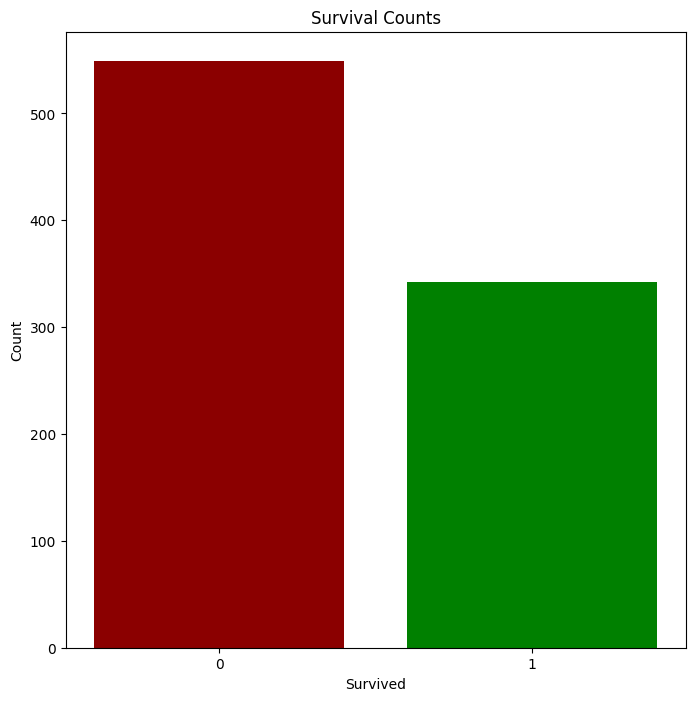

In [21]:
plt.figure(figsize=(8,8))
plt.bar(Survived['Survived'],Survived['count'],color=['darkred','green'])
plt.xticks(Survived['Survived'])
plt.title('Survival Counts')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

**This graph show the people are Survived and non Survived and 0 == not Survived 1 == Survived**

<h2>Survived from male and female<h2>

In [24]:
Survived_male_female = df.groupby('Sex')['Survived'].value_counts().reset_index()
Survived_male_female

,Sex,Survived,count
0,female,1,233
1,female,0,81
2,male,0,468
3,male,1,109


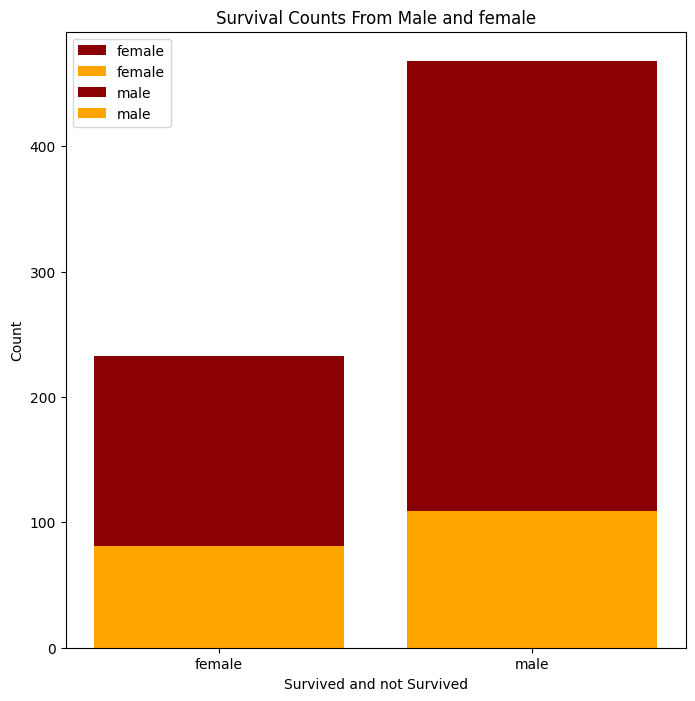

In [26]:
plt.figure(figsize=(8,8))
plt.bar(Survived_male_female['Sex'],Survived_male_female['count'],color=['darkred','orange'],label=Survived_male_female['Sex'])
plt.xticks(Survived['Survived'])
plt.title('Survival Counts From Male and female')
plt.xlabel('Survived and not Survived')
plt.ylabel('Count')
plt.legend()
plt.show()

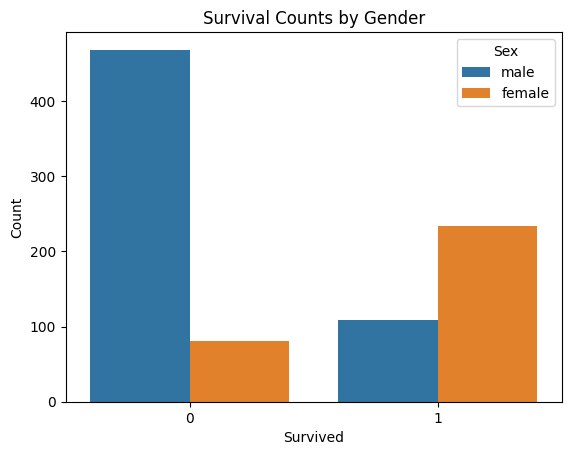

In [27]:

sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival Counts by Gender')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

**From last 2 graph we can see the number of Survived and not Survived from male and female**

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [29]:
pclass = df['Pclass'].value_counts().reset_index()
pclass

,Pclass,count
0,3,491
1,1,216
2,2,184


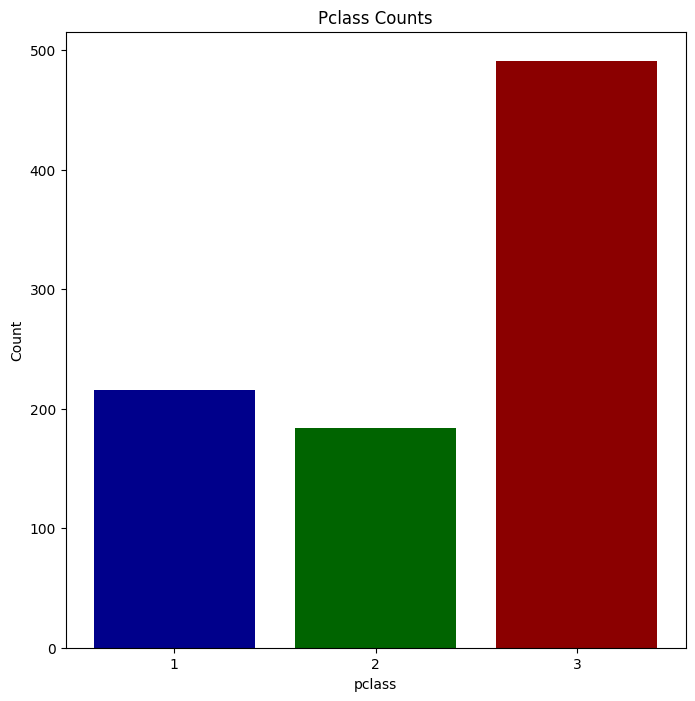

In [30]:
plt.figure(figsize=(8,8))
plt.bar(pclass['Pclass'],pclass['count'],color=['darkred','darkblue','darkgreen'])
plt.xticks(pclass['Pclass'])
plt.title('Pclass Counts')
plt.xlabel('pclass')
plt.ylabel('Count')
plt.show()

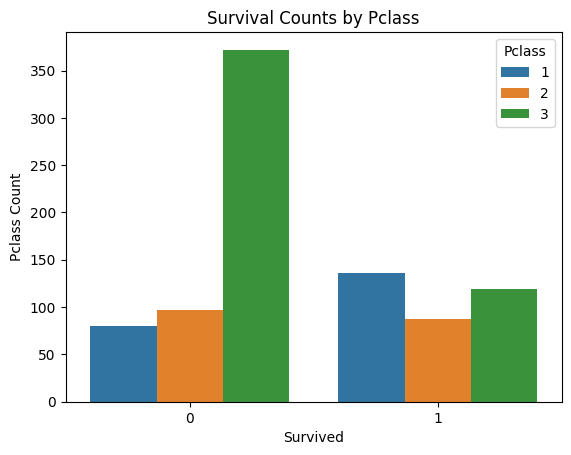

In [31]:
sns.countplot(x='Survived', hue='Pclass', data=df)
plt.title('Survival Counts by Pclass')
plt.xlabel('Survived')
plt.ylabel('Pclass Count')
plt.show()

**this graph we can see the number of ticket are sell and from any class 1 or 2 or 3 and the second graph show the number of Survived in every class**

In [ ]:
df.head()

<h2>Sibsp<h2>

In [32]:
df['SibSp'].value_counts().reset_index()

,SibSp,count
0,0,608
1,1,209
2,2,28
3,4,18
4,3,16
5,8,7
6,5,5


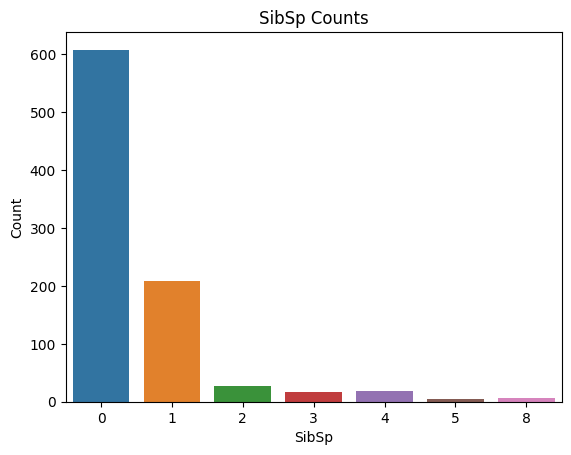

In [33]:
sns.countplot(x='SibSp',data=df)
plt.title('SibSp Counts')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()

**sibsp	# of siblings / spouses aboard the Titanic and every number mean the number of siblings**

In [34]:
df['Parch'].value_counts().reset_index()

,Parch,count
0,0,678
1,1,118
2,2,80
3,5,5
4,3,5
5,4,4
6,6,1


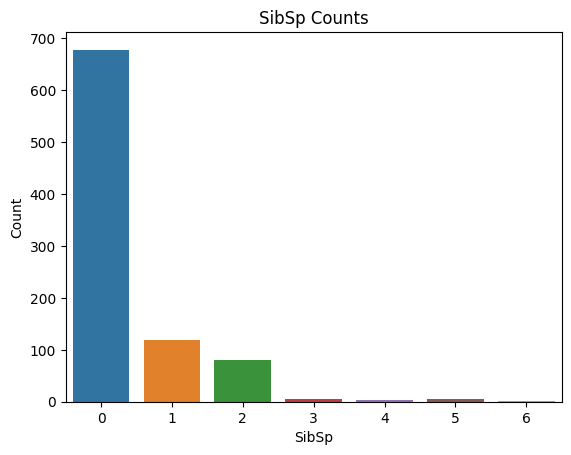

In [35]:
sns.countplot(x='Parch',data=df)
plt.title('SibSp Counts')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()

**Parch	# of Parents aboard the Titanic and every number mean the number of Parents on titanic**

<h2>Embarked<h2>

In [36]:
df['Embarked'].value_counts().reset_index()

,Embarked,count
0,S,644
1,C,168
2,Q,77


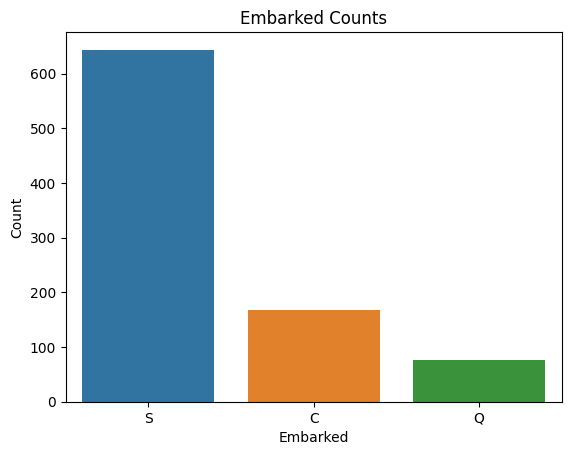

In [37]:
sns.countplot(x='Embarked',data=df)
plt.title('Embarked Counts')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

****embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton****

<h2>Distributions<h2>

In [39]:
histogram_labels = ['Fare',
                    'Age'
                   ]

colors = px.colors.qualitative.Vivid
for i in range(len(histogram_labels)):
    fig = px.histogram(df, 
                       histogram_labels[i], 
                       title=f'{histogram_labels[i]} distribution in top hits', 
                       color_discrete_sequence=[colors[i]]
                      )
    iplot(fig)

# Train Test Split

In [40]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

**Drop the columns i don't need**

In [41]:
df.drop(columns=['PassengerId','Name','Ticket'],inplace=True)

In [ ]:
df

In [ ]:
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [ ]:
df

In [ ]:
X = df.drop(columns='Survived',axis=1)
Y = df['Survived']

In [ ]:
X

In [ ]:
Y

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=43)

In [ ]:
X_train

In [ ]:
x_test

In [ ]:
Y_train

In [ ]:
y_test

<h2>Visualization the realtion between the columns using corr<h2>

In [ ]:
corrcolumns = df.drop(columns=['Embarked','Sex'])
corrcolumns

In [ ]:
corrcolumns.corr()

In [ ]:
sns.heatmap(corrcolumns.corr(), annot=True, cmap='coolwarm', fmt=".2f")

# Logistic Regression Model

In [ ]:
logmodel = LogisticRegression(max_iter=5000,  C=0.1)

In [ ]:
logmodel.fit(X_train,Y_train)

In [ ]:
y_pred = logmodel.predict(x_test)
y_pred

In [ ]:
y_test.values

In [ ]:
logmodel.score(x_test, y_test)

In [ ]:
logmodel.score(X_train, Y_train)

# Model Evaluations

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))